In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score

In [29]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.svm import SVC

In [30]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

c_train = train_df.copy()
c_test = test_df.copy()

In [31]:
df_frac = train_df.sample(frac = 0.1)
df_frac.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
13438,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29344,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8138,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16716,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15510,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


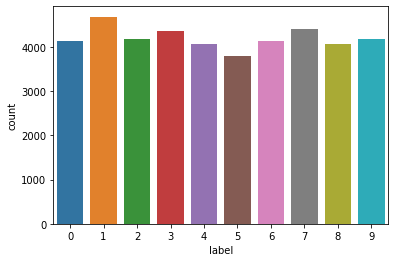

In [32]:
sns.countplot(train_df['label'])

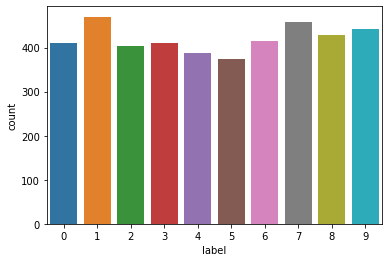

In [33]:
sns.countplot(df_frac['label'])

In [34]:
df_frac.label.isna().sum()

0

In [35]:
train = df_frac.drop(['label'], axis = 1)
target = df_frac['label']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(train, target, random_state = 101)

In [46]:
svc = SVC()

In [47]:
svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [48]:
test_df.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [52]:
predicted = svc.predict(X_test)

In [53]:
from sklearn import metrics
print(round(metrics.accuracy_score(y_test, predicted) * 100, 2))

94.1
